<font size="6">**Exploring the Australian Same-sex Marriage Vote Results**</font>

Table of contents:

1. Introduction
2. Research Questions
3. Data Files
4. Data Cleaning and Corrections
5. Analyses' Results and Discussions
6. Conclusion
7. References

<font size="4">**1. Introduction**

Past studies have shown that LGBT discrimination may cause mental health issues (Meyer, 2003). Thus it might be of interest for LGBT individuals to live in an area with less discrimination. In 2017, Australia conducted a national same-sex marriage vote with binary Yes or No option. The yes-vote count could possibly be an indication of how accepting a certain area is to the LGBT individuals, where relationship between yes/no votes and the voters demographic variables can also be analysed. For instance, past data analysis (Australian Bureau of Statistics: ABS, 2017) found that Australian Capital Territory (ACT) has the highest Yes voters.

However, Yes-vote count alone may not easily visualize a  view of how accepting a certain area is for the LGBT individuals, because the No-vote count and the total proportion were accounted separately (i.e., it is possible that areas with high Yes-votes may have high No-votes as well, meaning such area might not be the most accepting). Accordingly, in this project, data analyses will be performed using Yes/No Odd proportion instead of just Yes-vote count to indicate which state/electoral division might be the most accepting, and how the Yes/No Odd proportion can be linked to demographic variables such as age, gender, education, and income. Additionally, I will also analyse if the participation rate is affected by voters' age and gender.


<font size="4">**2. Research Questions**

Below is the list of specific questions of interest:
1. What is the odd of yes votes for each state?
2. For each state, which electorate has the highest odd of yes votes? and which electorate has the lowest odd? How large is the discrepancy between them?
3. Does the odd of yes votes depend on the gender proportion of the electorate residents?
4. Does the odd of yes votes depend on the voters' age of each electorate? (measured by mean age and median age)
5. Does the odd of yes votes affected by education level, income, and demographic area classification(urban/rural status)?
6. Does the participation rate affected by voters' gender and age? 




<font size="4">**3. Data Files**

Below is the list of five data files used in this project along with their summaries. The key variable that links the files is the 'Electoral Division'.

<font size="3">**3.1. vote_results.csv**

File obtained from Kaggle (O'neill, 2018). The Kaggle author modified data from ABS website https://marriagesurvey.abs.gov.au/. Main data columns include:


* Electoral Division
* State
* Yes
* No
* Response Clear
* Response Unclear
* Nonresponding



Note: Values are the frequency count.

<font size="3">**3.2. voting_participant_age.csv**

Similarly, this file is also obtained from the author above via Kaggle (O'neill, 2018), which was modified from the same ABS resource. Main data columns include:


* Electorate Division
* State
* Gender
* Age Range
* Age Lower
* Age Upper
* Eligible
* Participant

Notes: 
* 'Age Range' is the age category the voters are in, whereas the 'age lower' and 'age upper' are the lower and upper range of the said category (e.g., 20-24 is the age range, 20 is age lower and 24 is age upper). 
* 'Eligible' column contains the number of eligible voters, while 'participant' column has the elible voters that actually did vote.

<font size="3">**3.3. education_level.csv**

This file is one excel sheet extracted from a bigger excel file with multiple sheets obtained directly from ABS (2019). Data columns include:

* Electoral Division
* Year 12 or higher
* Cert III or higher

Note: Values are the population proportion that has completed that level of education.

<font size="3">**3.4. income.csv**

This file is also an excel sheet extracted from a bigger excel file with multiple sheets obtained from ABS (2019). Data columns include:

* Electoral Division
* Weekly Income

Note: The Weekly Income is the Median weekly household Income in AU$

<font size="3">**3.5. demo_class.csv**

This file was was obtained from Australian Electoral Commission (2021). Columns include:

* Electoral Division
* Demographic Classification
* State

# <font size="4">**4. Data Cleaning and Corrections**

<font size="3">**4.1. Inspecting the Data**

In [19]:
# Importing modules as needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [20]:
# Import the data

vote_df = pd.read_csv("vote_results.csv")
ageGender_df = pd.read_csv("voting_participant_age.csv")
income_df = pd.read_csv("income.csv")
education_df = pd.read_csv("education_level.csv")
demo_df = pd.read_csv("demo_class.csv")
# Quick observation on all dataframe

print(demo_df.columns.is_unique)
print(demo_df.shape)
print(demo_df[demo_df.duplicated() == True])
print ('\n')
print(vote_df.columns.is_unique)
print(vote_df.shape)
print(vote_df[vote_df.duplicated() == True])
print ('\n')
print(ageGender_df.columns.is_unique)
print(ageGender_df.shape)
print(ageGender_df[ageGender_df.duplicated() == True])
print ('\n')
print(income_df.columns.is_unique)
print(income_df.shape)
print(income_df[income_df.duplicated() == True])
print ('\n')
print(education_df.columns.is_unique)
print(education_df.shape)
print(education_df[education_df.duplicated() == True])
education_df.head()

True
(151, 3)
Empty DataFrame
Columns: [Electoral Division, Demographic Classification, State]
Index: []


True
(150, 7)
Empty DataFrame
Columns: [Electoral Division, State, Yes, No, Response Clear, Response Unclear, Nonresponding]
Index: []


True
(4500, 11)
Empty DataFrame
Columns: [Electoral Division, State, Gender, Age Range, Age Lower, Age Upper, Eligible, Participant, Unnamed: 8, Unnamed: 9, Unnamed: 10]
Index: []


True
(151, 2)
Empty DataFrame
Columns: [Electoral Division, Weekly Income]
Index: []


True
(151, 3)
Empty DataFrame
Columns: [Electoral Division, Year 12  or higher, Cert III or higher]
Index: []


,Electoral Division,Year 12 or higher,Cert III or higher
0,Adelaide,0.824,0.493
1,Aston,0.797,0.493
2,Ballarat,0.686,0.451
3,Banks,0.834,0.478
4,Barker,0.579,0.349


**4.2. Corrections**


* Seven territories' names that have changed since 2017.

    These seven names in Electoral Division column were replaced appropriately in vote_df and ageGender_df:

    * Batman replaced by Cooper 
    * Denison replaced by Clark
    * McMillan replaced by Monash
    * Melbourne Ports by Macnamara
    * Murray by Nicholls
    * Wakefield was replaced by Spence 
    * Port Adelaide was abolished in 2018 and dispersed into Spence, Adelaide, and Makins

        Port Adelaide will not be analysed in research question 5 where income, education_level, and demo_class files were used, as Port Adelaide data does not exist there (as apparent from 150 rows in these files, compared to 151 rows in vote_df). The Port Adelaide row will be excluded automatically with merge function later.

        The data analysis on Wakefield, Adelaide, and Makins will be carried on as usual but as I have no way of knowing how they were dispersed, the dispersion of Port Adelaide into these three territories will be ignored in the analysis. Hence please interpretate the results with this in consideration.

* The last age range category has higher upper age value (85-125) compared to other categories with shorter age range (e.g. 20-24).Since I will be averaging the age value, and because this dataset defines age in age-range, having an outlier on the upper value would increase the whole group's average age, hence I replaced the upper age value of 125 to 105 to reduce this outliers effect.

In [21]:
vote_df["Electoral Division"].replace({"Batman": "Cooper", "Denison": "Clark", "McMillan": "Monash", "Melbourne Ports": "Macnamara", "Murray": "Nicholls", "Wakefield": "Spence"}, inplace=True)
ageGender_df["Electoral Division"].replace({"Batman": "Cooper", "Denison": "Clark", "McMillan": "Monash", "Melbourne Ports": "Macnamara", "Murray": "Nicholls", "Wakefield": "Spence"}, inplace=True)
vote_df = vote_df.sort_values(by=["Electoral Division"], ascending=True)
ageGender_df["Age Upper"].replace({125: 100}, inplace=True)


**4.3. Cleaning**

* To include only the relevant columns, and to help merging the files, I changed the format of all numerical cells in excel to 'general' to remove the commas. 

* On income_df, education_df, and demo_df;
    * Deleted the first 5 rows and last 3 rows (titles and information of the file from ABS)
    * Deleted the blank row between the column label and the index
    * Streamlined 'Electoral Division' column label name (and added this label if previously blank)
    * Changed 'States or Territory' column name to 'State'

* On income_df, the 'Weekly rent', 'mortgage expenses', and 'tenure levels' columns are not needed and were deleted, as I'm only concerned about 'Income level'.

* On vote_df, 'Response clear' and 'Response unclear' were removed, as they are not needed.

# <font size="4">**5. Analyses' Results and Discussions**

**5.1. Research Question 1:
What is the proportion of yes/no voters for each state**

                                  Yes       No  Yes/No Proportion
State                                                            
New South Wales               2374362  1736838           1.367060
Northern Territory              48686    31690           1.536321
Queensland                    1487060   961015           1.547385
South Australia                592528   356247           1.663250
Tasmania                       191948   109655           1.750472
Western Australia              801575   455924           1.758133
Victoria                      2145629  1161098           1.847931
Australian Capital Territory   175459    61520           2.852064


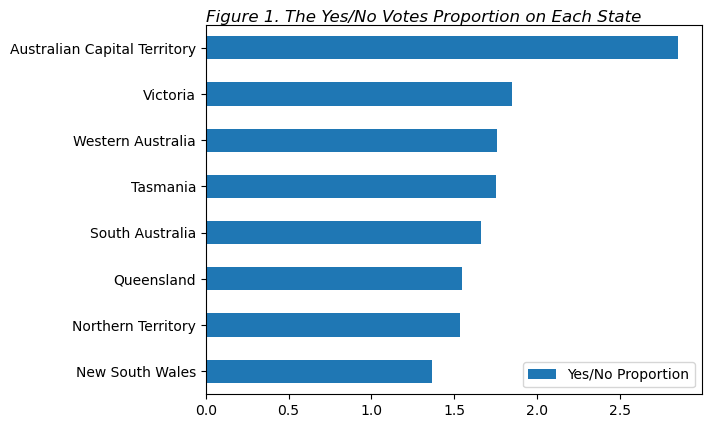

In [22]:
qs1 = vote_df.groupby(['State']).agg({'Yes': 'sum', 'No': 'sum'}) #grouping the datafile by 'State' and summing the Yes and No votes
qs1["Yes/No Proportion"] = qs1["Yes"]/qs1["No"] #finding the proportion
qs1 = qs1.sort_values(by= 'Yes/No Proportion', ascending=True)#sorting
print(qs1)

qs1.plot(
    kind = 'barh', #simple horizontal bar plotting
    xlabel = "",
    y = 'Yes/No Proportion')
plt.title(label='Figure 1. The Odd of Yes Votes on Each State', 
          fontweight=10, loc ='left', fontstyle='oblique',
          pad='2.0')
plt.savefig('plot.png')

As apparent from Figure 1., it appears that the ACT has the highest odd of yes votes at 2.85, meaning there are 2.85 more voters choosing yes than no in that state. It is also notable that New South Wales(NSW) has the lowest odd of yes votes at 1.37 which is rather surprising as Sydney always celebrates Mardi Gras every year. This could mean that there are other electorate divisions in NSW that votes more No than Yes, which will be explored in the next research question.

**5.2. Research Question 2:
For each state, which electorate has the highest odd of yes votes? and which electorate has the lowest odd?**

                            State Electoral Division    Value  \
24   Australian Capital Territory           Canberra  highest   
48   Australian Capital Territory             Fenner   lowest   
138               New South Wales             Sydney  highest   
12                New South Wales           Blaxland   lowest   
134            Northern Territory            Solomon  highest   
89             Northern Territory           Lingiari   lowest   
19                     Queensland           Brisbane  highest   
98                     Queensland            Maranoa   lowest   
0                 South Australia           Adelaide  highest   
4                 South Australia             Barker   lowest   
39                       Tasmania              Clark  highest   
16                       Tasmania            Braddon   lowest   
105                      Victoria          Melbourne  highest   
23                       Victoria            Calwell   lowest   
36              Western A

Text(0.0, 1.0, 'Figure 2. The Comparison of Electoral Divisions with Highest and Lowest Yes/No Votes Proportion on Each State')

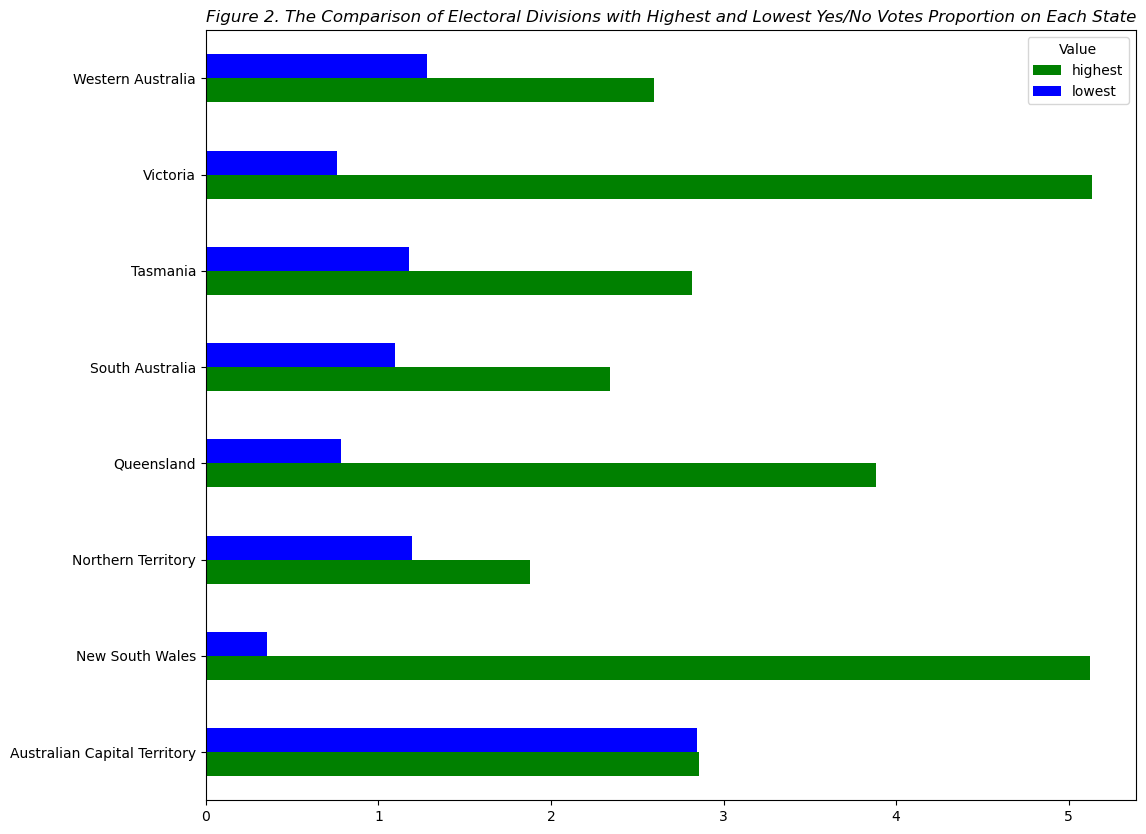

In [23]:
vote_df["Yes/No Proportion"] = (vote_df["Yes"]) / (vote_df["No"])
qs2max = vote_df.loc[vote_df.groupby("State")["Yes/No Proportion"].idxmax()] #finding the highest Yes/No vote proportion by State
qs2max["Value"] = 'highest' #adding a column defining this electorate division has the 'highest' proportion value in that state
qs2min = vote_df.loc[vote_df.groupby("State")["Yes/No Proportion"].idxmin()] #finding the lowest Y/N vote proportion
qs2min["Value"] = 'lowest' #adding a column to define this electorate as 'lowest'
qs2 = pd.concat([qs2max, qs2min]) #combining qs2max and qs2min 
qs2 = qs2[['State', 'Electoral Division', 'Value', 'Yes/No Proportion']] #selecting the columns of interest
qs2 = qs2.sort_values(by= 'State', ascending=True)
print(qs2)

qs2.set_index(['State','Value'], inplace=True) #setting State and Value as index
qs2 = qs2.unstack('Value') #then unstack Value
qs2 = qs2.fillna(0) #filling NaN with 0

colours = {'highest': 'green', 'lowest': 'blue'} #defining colour dictionary for plot below

qs2.plot(
    kind = 'barh', #with horizontal bar style
    xlabel = "", y = 'Yes/No Proportion',
    figsize = [12, 10], #enlarge the figure to make it look nicer
    color = colours #add colours to 'highest' and 'lowest' using the dictionary defined above 
)
plt.title(label='Figure 2. The Comparison of Electoral Divisions with Highest and Lowest Odd of Yes Votes on Each State', 
          fontweight=15, loc ='left', fontstyle='oblique')
         

The list of electoral divisions with the highest/lowest odd of yes votes by states can be seen from the table output above. Unsurprisingly, the electorates with highest odd on each state appears to be the major capital cities. 

Furthermore, despite having the highest odd of yes votes on average by state, it appears on Figure 2. that the difference between the highest and lowest electorates in ACT is miniscule (which makes sense as ACT is a small citystate). Whereas every states have rather visible disparity between the lowest and the highest electorate divisions. Notably however, it appears that the gap is highest in NSW, which explains why NSW odd of yes votes is low in previous question.

**5.3. Research Question 3:
Does the odd of yes votes depend on the gender proportion of the electorate residents?**

                    Yes/No Vote Proportion Overall  Male Voters Proportion  \
Electoral Division                                                           
Adelaide                                  2.344664                0.474169   
Aston                                     1.629835                0.470504   
Ballarat                                  2.394198                0.466468   
Banks                                     0.814276                0.473249   
Barker                                    1.094548                0.478428   
...                                            ...                     ...   
Werriwa                                   0.568925                0.481764   
Whitlam                                   1.650334                0.470786   
Wide Bay                                  1.254742                0.476252   
Wills                                     2.328310                0.467156   
Wright                                    1.315453              

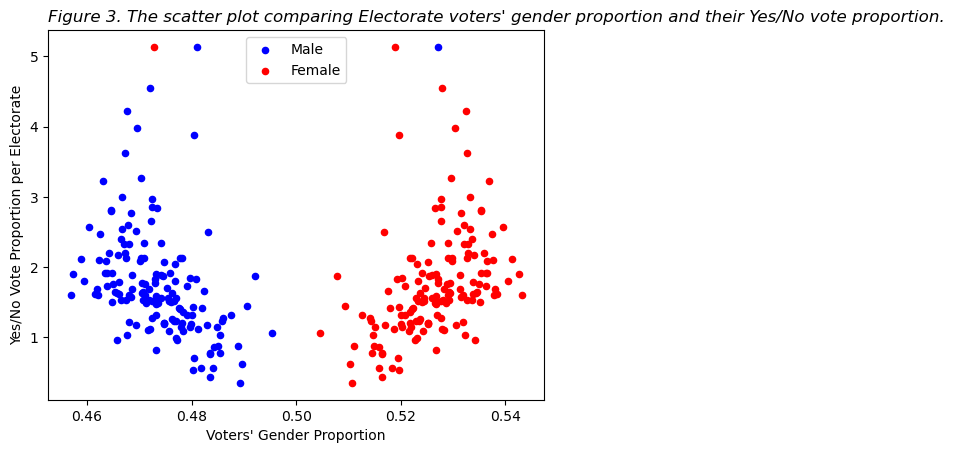

In [24]:
qs3 = ageGender_df.merge(vote_df, on='Electoral Division', how='left') #merging the datafiles to get the Y/N proportion, making sure the bigger data from ageGender_df is not discarded by adding how ='left'

qs3 = qs3.groupby(['Electoral Division', 'Gender', 'Yes/No Proportion'], as_index=False).agg({'Participant':'sum'})
#grouping by these 3 categories, but do not set them as index, sum the values in participant column
qs3.set_index(['Electoral Division', 'Gender'], inplace=True)
#now set electoral division and gender as index, so it can be unstacked below
qs3 = qs3.unstack('Gender')

#calculating both male and female proportion of participant that did vote
qs3['Male Proportion'] = qs3['Participant', 'male']/ (qs3['Participant', 'male']+qs3['Participant', 'female'])
qs3['Female Proportion'] = qs3['Participant', 'female']/ (qs3['Participant', 'male']+qs3['Participant', 'female'])
#to fix the multi-index column, combine the column names with the function below
qs3.columns = ['_'.join(col) for col in qs3.columns]

#then drop the columns that are not used, and rename other columns appropriately
qs3.drop(columns=['Yes/No Proportion_male', 'Participant_female', 'Participant_male'], inplace=True)
qs3.rename(columns={'Yes/No Proportion_female': 'Yes/No Vote Proportion Overall', 'Male Proportion_': 'Male Voters Proportion', 'Female Proportion_': 'Female Voters Proportion'}, inplace=True)
print(qs3)

#finding the correlations between Y/N vote and gender proportion, rounded to 3 decimal places
cor3 = round(qs3['Yes/No Vote Proportion Overall'].corr(qs3["Male Voters Proportion"]), 3)
cor4 = round(qs3['Yes/No Vote Proportion Overall'].corr(qs3["Female Voters Proportion"]), 3)
print(f"The correlation between MALE Voters Proportion and Overall Yes/No Proportion is {cor3},")
print(f"whereas the correlation between FEMALE Voters Proportion and Overall Yes/No Proportion is {cor4}.\n")

#scatter plotting the male voters proportion and yes/no votes, marked as blue
#the female voters proportion was scatter plotted on the same axis, marked as red
ax1 = qs3.plot(label='Male', kind='scatter', x='Male Voters Proportion', y='Yes/No Vote Proportion Overall', color='b')    
ax2 = qs3.plot(label='Female', kind='scatter', 
x='Female Voters Proportion', y='Yes/No Vote Proportion Overall',
xlabel = "Voters' Gender Proportion", ylabel = "Yes/No Vote Proportion per Electorate", 
color='r', ax=ax1)    
plt.legend(loc="upper center") #adding legend with upper left position
plt.title(label="Figure 3. The scatter plot comparing Electorate voters' gender proportion and their odd of yes votes.", 
          fontweight=15, loc ='left', fontstyle='oblique')
plt.savefig('plot3.png')

As apparent from Figure 3., there seems to be a slight downward trend between the proportion of men in the area and their odd of yes votes, with correlation of -0.16. This means that the more men in the area, the less accepting the area is. The female plot is, as expected, a mirror image of the male scatter plot. 

It has to be noted however, that with the information on the current dataset, this correlation is not the most direct correlation as it is comparing the voters' gender proportion in each electorate to the overall electorate odd of yes votes. A better comparison that future studies could have done is to directly comparing voters' gender and their yes/no vote instead of grouping them into each electorate.

**5.4. Research Question 4: Does the odd of yes votes depend on the voters' age of each electorate? (measured by mean age and median age)**

* On ageGender_df; since the age bracket is categorical, the average of the bracket will be calculated and added, with 'Age' as its column label. It will then be treated as continuous variable to find the correlation with other variables.


                    Age*Participant  Participant  Participants' Mean Age  \
Electoral Division                                                         
Adelaide                  4363554.0        88422               49.349189   
Aston                     3801666.5        77706               48.923719   
Ballarat                  4675369.5        92583               50.499222   
Banks                     4234642.0        83846               50.504997   
Barker                    4430226.5        81124               54.610553   
...                             ...          ...                     ...   
Werriwa                   3860950.5        83381               46.304920   
Whitlam                   4766644.0        92027               51.796147   
Wide Bay                  4628198.0        83416               55.483337   
Wills                     4462828.0        97156               45.934662   
Wright                    4154393.0        82545               50.328827   

           

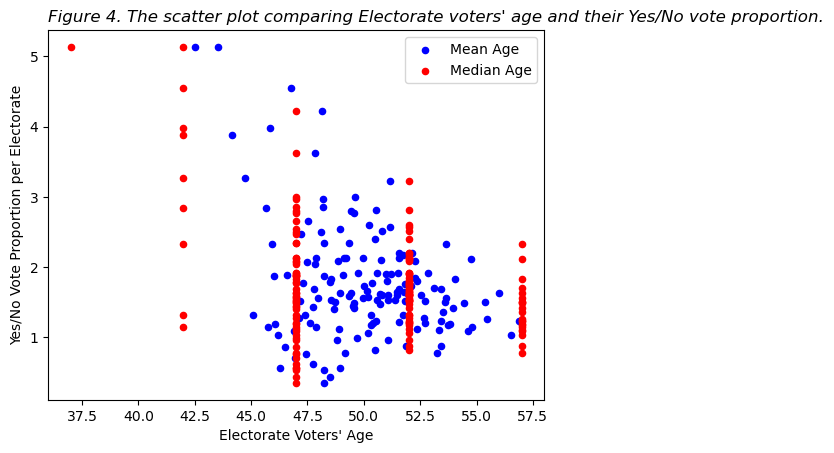

In [25]:
#finding the average of the age bracket
ageGender_df["Age"] = (ageGender_df["Age Lower"] + ageGender_df["Age Upper"])/2

#finding the mean age per electoral division. The 'n' in this calculation is the number of participants.
ageGender_df["Age*Participant"] = ageGender_df["Age"]*ageGender_df["Participant"]
qs4mean = ageGender_df.groupby(['Electoral Division'], as_index=False).agg({'Age*Participant':'sum', 'Participant':'sum'})
qs4mean["Participants' Mean Age"] = qs4mean["Age*Participant"]/qs4mean["Participant"]


#finding the median, not as straightforward as finding the mean.
qs4 = ageGender_df
#need to convert the age into integer so there is 0 decimal places
qs4["Age"] = qs4["Age"].round(decimals=0).apply(np.ceil) 
qs4["Age"] = qs4["Age"].astype("int")
qs4["Age"] = qs4["Age"].astype("str") #then reconvert it back as string, this is done so the column names can be rejoined below
qs4median = qs4.groupby(['Electoral Division', 'Age']).agg({'Participant':'sum'})
qs4median = qs4median.unstack('Age')

qs4median.columns = qs4median.columns.droplevel(0) #dropping 'Participant' multi index column label
qs4median.columns = [''.join(col) for col in qs4median.columns] #removing 'Age' multiindex column label

qs4median = qs4median[ [ col for col in qs4median.columns if col != '92'] + ['92'] ] #moving 92 to the end of table
qs4median.columns = qs4median.columns.astype(int) #now that all the messed up indexing and column labeling has been dealt with, reconvert the age columns from string to integer

from numpy import median
m = list() # median list
for index, row in qs4median.iterrows():  
    v = list() # value list
    z = zip(row.index, row.values) 
    for item in z:
        for f in range(item[1]):
            v.append(item[0])
    m.append(median(v)) #creating a list of the median by checking for each row which one is the median

qs4median = pd.DataFrame({'Electoral Division': qs4median.index, 'Median Age': m}) 
#now creating a new dataframe that define the electoral division as the index and the median age from the newly created list

qs4mean['Median Age'] = qs4median['Median Age'] #adding the median age column into qs4mean dataset
qs4mean.set_index(['Electoral Division'], inplace=True) #returning Electoral Division as index
qs4mean['Yes/No Vote Proportion'] = qs3['Yes/No Vote Proportion Overall'] #adding the Yes/No Vote Proportion from qs3
print(qs4mean)

#finding the correlation with mean age and median age, rounded to 3 decimal places
cor1 = round(qs4mean['Yes/No Vote Proportion'].corr(qs4mean["Participants' Mean Age"]), 3)
cor2 = round(qs4mean['Yes/No Vote Proportion'].corr(qs4mean["Median Age"]), 3)
print(f"The correlation between Participants' MEAN Age and Overall odd of yes votes is {cor1},")
print(f"while the correlation between Participants' MEDIAN Age and Overall odd of yes votes is {cor2}.\n")

#scatter-plotting mean age against yes/no vote proportion, marked as blue
ax3 = qs4mean.plot(label='Mean Age', kind='scatter', 
x="Participants' Mean Age", y='Yes/No Vote Proportion', 
ylabel = "Yes/No Vote Proportion per Electorate", 
color='b')    
#scatter plotting median age against yes/no proportion, marked as red, on the same axis as the mean-age plot above
ax4 = qs4mean.plot(label='Median Age', kind='scatter', 
x='Median Age', y='Yes/No Vote Proportion',
xlabel = "Electorate Voters' Age", ylabel = "Yes/No Vote Proportion per Electorate", 
color='r', ax=ax3)    
plt.legend(loc="upper right")

plt.title(label="Figure 4. The scatter plot comparing electorate voters' age and their odd of yes votes.", 
          fontweight=15, loc ='left', fontstyle='oblique')

plt.savefig('plot3.png')


As can be seen from Figure 4., there is a downward trend overall between age and odd of yes votes, with the correlation of -0.337 for mean age, and -0.381 for median age. This suggest that older voters seem to be more conservative and less accepting to the same-sex marriage. On a sidenote, one interesting  finding is that Australia has an aging population.

Similar with the weakness mentioned in previous research question. The current dataset only allows for the comparison of mean and median age per electorate with the odd of yes votes per electorate, which is not the most direct way of comparing. It is better to compare the odd of yes votes with each voter's age individually instead of grouping them into each electorate.

**5.5. Research Question 5: Does the odd of yes votes affected by education level, income, and demographic area classification(urban/rural status)?**

    Electoral Division  Demographic Classification            State  \
0             Adelaide                           4  South Australia   
1                Aston                           3         Victoria   
2             Ballarat                           2         Victoria   
3                Banks                           4  New South Wales   
4               Barker                           1  South Australia   
..                 ...                         ...              ...   
144            Werriwa                           3  New South Wales   
145            Whitlam                           2  New South Wales   
146           Wide Bay                           1       Queensland   
147              Wills                           4         Victoria   
148             Wright                           1       Queensland   

     Yes/No Vote Proportion Overall  Year 12  or higher  Cert III or higher  \
0                          2.344664               0.824             

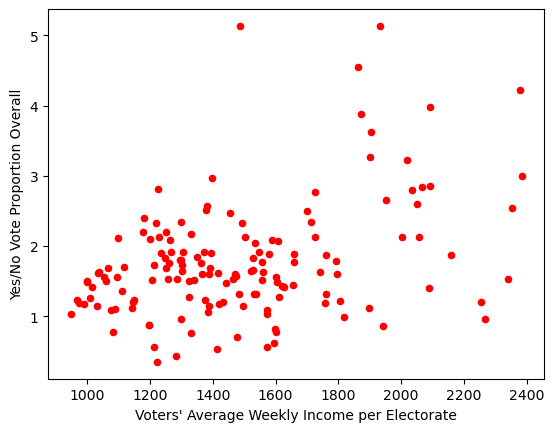

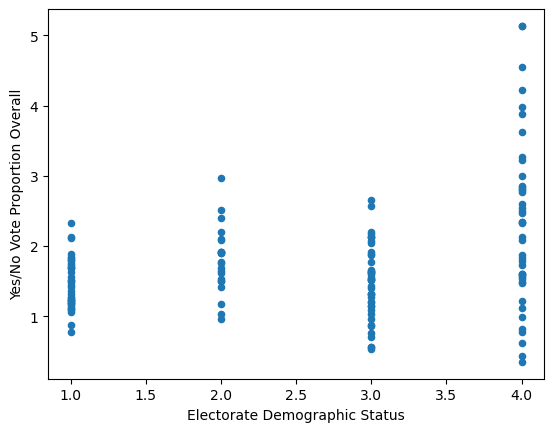

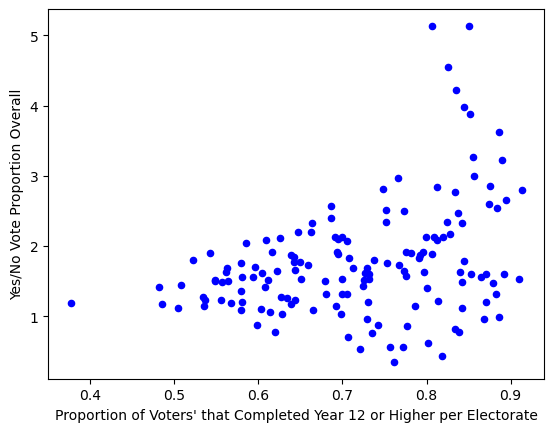

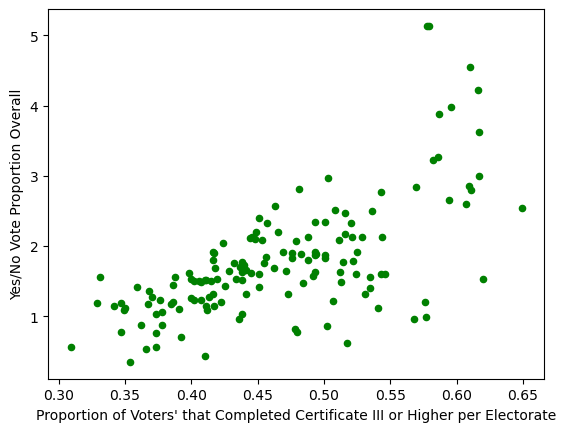

In [26]:
#changing the categorical values of demographic classification into numerical values, so correlation can be calculated
demo_df["Demographic Classification"].replace({"Inner Metropolitan": 4, "Outer Metropolitan": 3, "Provincial": 2, "Rural": 1}, inplace=True)

#merging the dataset with qs3 dataset(it has yes/no proportion column)
qs5 = demo_df.merge(qs3, on='Electoral Division')
#merging the dataset with other datasets (education and income), and fill the NaN value with 0
qs5 = qs5.merge(education_df, on='Electoral Division')
qs5 = qs5.merge(income_df, on='Electoral Division')
qs5 = qs5.fillna(0)
qs5.drop(columns=['Male Voters Proportion', 'Female Voters Proportion'], inplace=True)
print(qs5)

#convert the column values to float and integer just to make sure they are calculable
qs5["Year 12  or higher"] = qs5["Year 12  or higher"].astype("float")
qs5["Cert III or higher"] = qs5["Cert III or higher"].astype("float")
qs5["Weekly Income"] = qs5["Weekly Income"].astype("int")

#finding the correlations
cor3 = round(qs5['Yes/No Vote Proportion Overall'].corr(qs5["Weekly Income"]), 3)
cor4 = round(qs5['Yes/No Vote Proportion Overall'].corr(qs5["Demographic Classification"]), 3)
cor5 = round(qs5['Yes/No Vote Proportion Overall'].corr(qs5["Year 12  or higher"]), 3)
cor6 = round(qs5['Yes/No Vote Proportion Overall'].corr(qs5["Cert III or higher"]), 3)
print(f"The correlation between Participants' Weekly Income and Overall odd of yes votes is {cor3},")
print(f"whereas the correlation between Demographic classification and Overall odd of yes votes is {cor4}.")
print(f"Furthermore, the correlation between the proportion of each electorate voters' who have completed year 12 or higher and Overall odd of yes votes is {cor5},")
print(f"and the correlation between the proportion of each electorate voters' who have completed Certificate III or higher and Overall odd of yes votes is {cor6}.\n")


#plotting them all individually to avoid confusion.
axIncome = qs5.plot(kind='scatter', y='Yes/No Vote Proportion Overall', x="Weekly Income", color='r', xlabel = "Voters' Average Weekly Income per Electorate")    
axDemo = qs5.plot(kind='scatter', y='Yes/No Vote Proportion Overall', x="Demographic Classification", xlabel = "Electorate Demographic Status")
axYear12 = qs5.plot(kind='scatter', y='Yes/No Vote Proportion Overall', x='Year 12  or higher', color='b', xlabel = "Proportion of Voters' that Completed Year 12 or Higher per Electorate")    
axCert3 = qs5.plot(kind='scatter', y='Yes/No Vote Proportion Overall', x='Cert III or higher', color='g', xlabel = "Proportion of Voters' that Completed Certificate III or Higher per Electorate")




As apparent from the correlations and the plots above. There is a general upward trend with correlation hovering around 0.3 in all categories. This suggests that there are more odd of yes votes for the voters with higher income, higher educations, and for those in close proximity with urban areas. It is notable that the correlation with those who completed Certificate III or more is twice as the correlation with those who only completed year 12. 
Another interesting finding is that the Yes/No vote proportion is more varied or stretched in inner metropolitan areas than in other urban classifications. But overall the trend is still more positive towards higher odd of yes.

**5.6. Research Question 6: Does the participation rate affected by voters' gender and age?** 

    Age  Male Participants/Total Male Eligible  \
0    18                               0.751081   
1    22                               0.689039   
2    27                               0.682713   
3    32                               0.692293   
4    37                               0.704104   
5    42                               0.725379   
6    47                               0.756100   
7    52                               0.785395   
8    57                               0.817561   
9    62                               0.848361   
10   67                               0.876178   
11   72                               0.893082   
12   77                               0.893505   
13   82                               0.878732   
14   92                               0.828653   

    Female Participants/Total Female Eligible  
0                                    0.811187  
1                                    0.758596  
2                                    0.754724  
3      

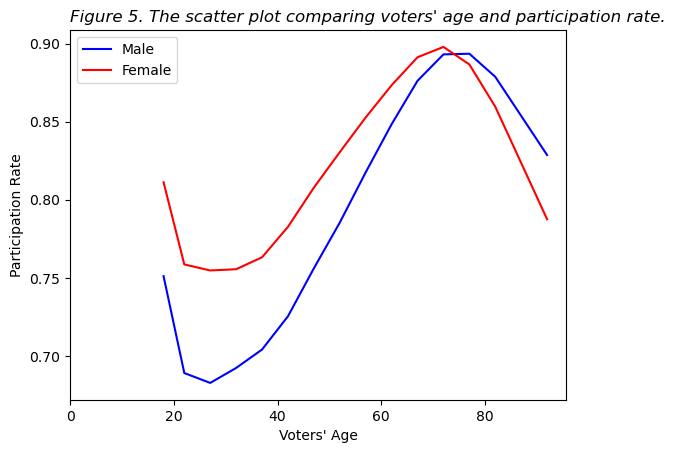

In [27]:
#changing age to integer so it has 0 decimals
#summing the participant and eligible values by gender and age
ageGender_df["Age"] = ageGender_df["Age"].astype("int")
qs6 = ageGender_df.groupby(['Gender', 'Age']).agg({'Participant':'sum', 'Eligible': 'sum'})
#split the data into male and female
qs6 = qs6.unstack('Gender')

#calculate the proportion of actual voters/eligible participant per gender
qs6['Male Participants/Total Male Eligible'] = qs6['Participant', 'male'] / qs6['Eligible', 'male']
qs6['Female Participants/Total Female Eligible'] = qs6['Participant', 'female'] / qs6['Eligible', 'female']

#collapsing the multi-index column
qs6.columns = [''.join(col) for col in qs6.columns]
#dropping unnecessary columns
qs6.drop(columns=['Participantmale', 'Eligiblemale', 'Participantfemale', 'Eligiblefemale'], inplace=True)
qs6.reset_index(inplace=True)
print(qs6)

#plotting age by participation rate, separated by gender, the female plot is combined with the male plot. xlim is set to 0 to get a fuller picture of the graph
ax8 = qs6.plot(label='Male', kind='line', xlim=0, x='Age', y='Male Participants/Total Male Eligible', color='b')    
ax9 = qs6.plot(label='Female', kind='line', xlim=0,
x='Age', y='Female Participants/Total Female Eligible',
xlabel = "Voters' Age", ylabel = "Participation Rate", 
color='r', ax=ax8)    
plt.legend(loc="upper left")
plt.title(label="Figure 5. The scatter plot comparing voters' age and participation rate.", 
          fontweight=15, loc ='left', fontstyle='oblique')

plt.savefig('plot9.png')

#finding the correlation between age and participation rate, splitted into male and female
cor8 = round(qs6['Age'].corr(qs6["Male Participants/Total Male Eligible"]), 3)
cor9 = round(qs6['Age'].corr(qs6["Female Participants/Total Female Eligible"]), 3)
print(f"The correlation between Male participants' age and their participation rate is {cor8},")
print(f"whereas the correlation between Female participants' age and their participation rate is {cor9}.")

Figure 5. has shown that there is indeed a positive trend overall between voters' age and their participation rate with the correlation between Male participants' age and their participation rate at 0.868, which is higher than the correlation between Female participants' age and their participation rate at 0.663. It also appears that those between the age of 20 and 40 have lower participation rate. Perhaps this can be attributed to the working age. Furthermore, the trend decreases for the elderly, and high for those below 20s. 


# <font size="4">**6. Conclusion**

To conclude, this study provides an overview of how the odd of yes in same-sex marriage vote can be used in preliminary-determining which area is the most accepting for the LGBT individuals, and it is more useful when targeted to specific electorate division versus viewing the overall proportion by state. In general, the capital cities of the states appear to be the most accepting.

Secondly, this study has confirmed that demographic variables indeed correlate with the odd of yes votes, with more odd of yes for voters of younger generation, female, those with higher income, education, and those living closer to inner metropolitan areas. However, gender appears to have the least correlation values (smaller effect) whereas completing higher level of education (certificate III or more) appears to have the highest correlation value/effect. Finally, participation rate are correlated by age, and steeper for male, where it seems that those in working age have lower participation rate. 



# <font size="4">**7. References**

Australian Bureau of Statistics. (2017). *Australian Marriage Law Postal Survey*. Retrieved August 11, 2021, from https://www.abs.gov.au/ausstats/abs@.nsf/mf/1800.0

Australian Bureau of Statistics (2019). *Commonwealth Electorate Data*. Retrieved August 11, 2021, from https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/2082.02019?OpenDocument 

Australian Electoral Commission (2021). *Demographic classification of electoral divisions*. Retrieved August 11, 2021, from https://www.aec.gov.au/electorates/maps.htm

Meyer, I. H. (2003). Prejudice, social stress, and mental health in lesbian, gay, and bisexual populations: conceptual issues and research evidence. *Psychological bulletin, 129*(5), 674–697. https://doi.org/10.1037/0033-2909.129.5.674

O'neill, M. (2018). *Australian Marriage Law Postal Survey*. Retrieved August 11, 2021, from https://www.kaggle.com/mylesoneill/australian-marriage-law-postal-survey?select=participant-information.csv